### Fist exploratory analysis

Import of needed libraries:

In [1]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt


Read the train data into pandas dataframes:

In [33]:
#df_series = pd.read_parquet('data/train_series.parquet') # contains actual measurement data
#df_events = pd.read_csv('data/train_events.csv') # contains metadata

Observe the first rows of both dataframes:

In [ ]:
#df_series.head()

In [ ]:
#df_series.shape

In [ ]:
#df_series.isna().sum()

--> no missing values in measurement data

In [ ]:
#df_events.head()

In [ ]:
#df_events.isna().sum()/df_events.count()

In [ ]:
#df_events.isna().sum()/df_events.count()

In [34]:
#msn.matrix(df_events)

<Axes: >

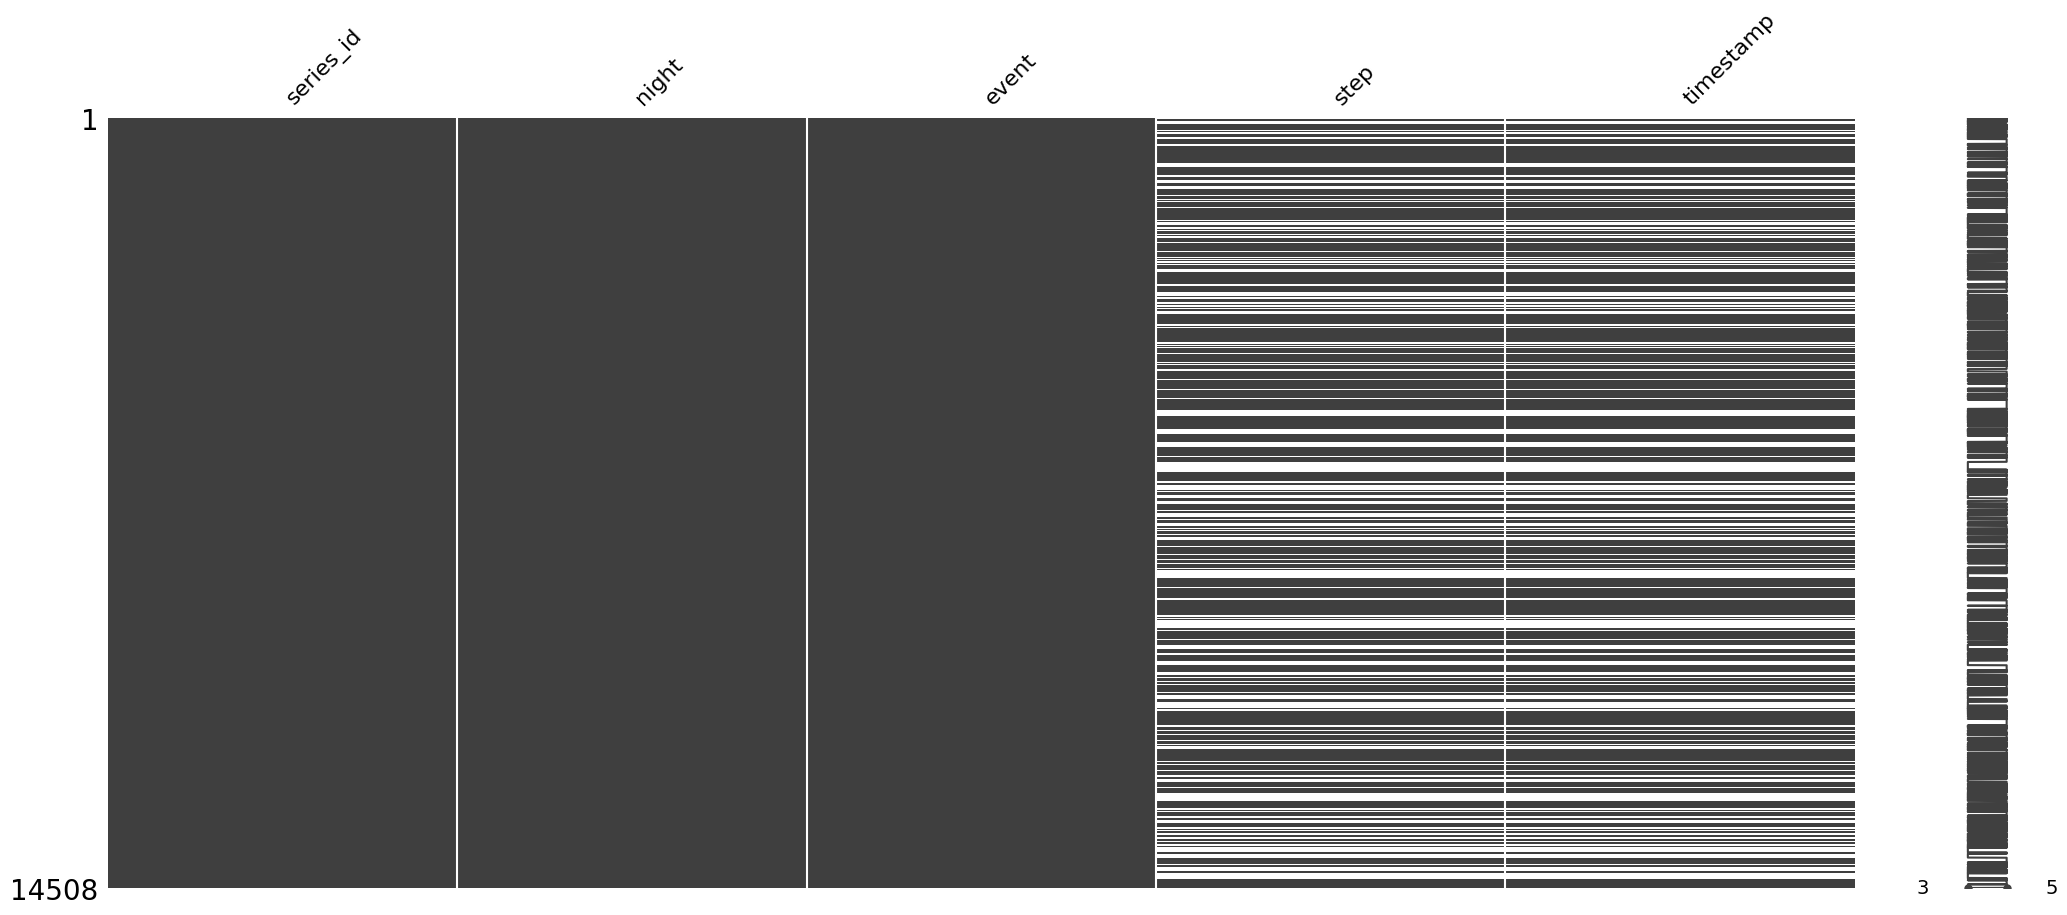

In [35]:
msn.matrix(df_events)

--> more than 50% of missing values in 'step' and 'timestamp' columns. 

In [ ]:
#df_comb = pd.merge(df_series, df_events, on=['series_id', 'timestamp'], how='left')

In [ ]:
#df_comb.to_parquet('data/df_comb.parquet')

In [3]:
df_comb = pd.read_parquet('data/merged_data_20231123_102759-001.parque')

In [ ]:
df_comb.shape

In [ ]:
df_comb.head()

In [32]:
df_comb.isna().sum()

series_id            0
step_x               0
timestamp            0
anglez               0
enmo                 0
night        127936755
event                0
step_y       127936755
dtype: int64

In [ ]:
df_comb['series_id'].nunique()

In [ ]:
df_comb['series_id'].unique()[3]

In [3]:
df_randpat = df_comb.loc[df_comb['series_id'] == '04f547b8017d']

In [ ]:
df_randpat.shape

In [ ]:
df_randpat.head()

In [ ]:
df_randpat.tail()

<Axes: xlabel='timestamp'>

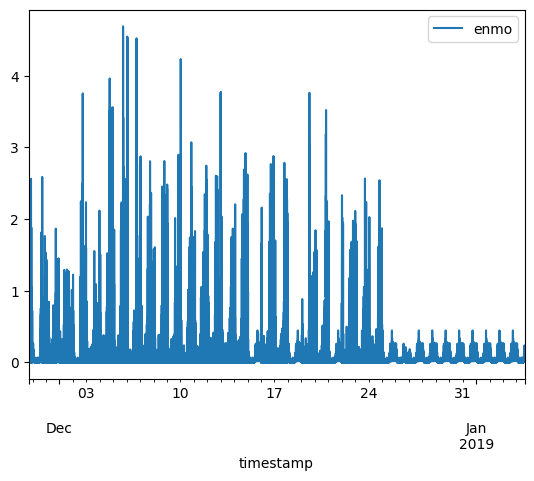

In [4]:
df_randpat.plot(x='timestamp', y='enmo')

In [4]:
def none_to_str(dataframe, column):
    ''' 
    This function returns the given dataframe with 'none' strings in the given column instead of actual None values.
    '''
    events = []
    for j in dataframe.index:
        if dataframe[column][j] == None:
            events.append('None')
        else:
            events.append(dataframe[column][j])
    dataframe[column] = events
    return dataframe

In [6]:
df_randpat2 = none_to_str(df_randpat, 'event')

/var/folders/v1/h4w0fsdj4bj445ghq3vk36yw0000gn/T/ipykernel_11030/3688025103.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = events


In [ ]:
df_randpat2['event'].unique()

<Axes: xlabel='anglez', ylabel='enmo'>

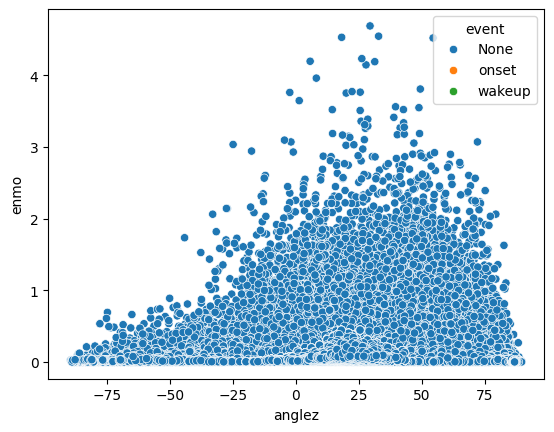

In [7]:
sns.scatterplot(df_randpat2, x = 'anglez', y= 'enmo', hue = 'event')

In [ ]:
sns.scatterplot(df_randpat, x = 'anglez', y= 'enmo', hue = 'event')

In [ ]:
df_randpat['event'].value_counts()

In [ ]:
sns.boxenplot(df_randpat, x = 'event', y = 'anglez', hue = 'event')

In [ ]:
sns.violinplot(df_randpat, x= 'event', y ='anglez', hue='event')

In [ ]:
sns.boxenplot(df_randpat, x = 'event', y = 'enmo', hue= 'event')
plt.yscale('log')

In [ ]:
sns.violinplot(df_randpat, x= 'event', y ='enmo', hue='event')
plt.yscale('log')

In [ ]:
sns.histplot(df_randpat, x='enmo',)
plt.yscale('log')

In [ ]:
sns.histplot(df_randpat, x= 'anglez')

In [ ]:
sns.violinplot(df_comb, x= 'event', y ='anglez', hue='event')

In [5]:
df_comb2 = none_to_str(df_comb, 'event')

In [ ]:
df_comb2.head()

In [ ]:
sns.histplot(df_comb, x='enmo',element = 'poly')
plt.yscale('log')

In [ ]:
sns.histplot(df_comb2, x='enmo', hue = 'event', element = 'poly')
plt.yscale('log')

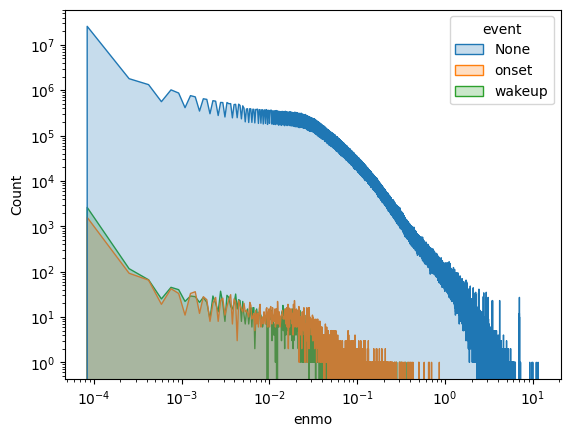

In [10]:
sns.histplot(df_comb2, x='enmo', hue = 'event', element = 'poly')
plt.yscale('log')
plt.xscale('log')

In [ ]:
sns.histplot(df_comb, x='anglez',element='poly', )


<Axes: xlabel='anglez', ylabel='Count'>

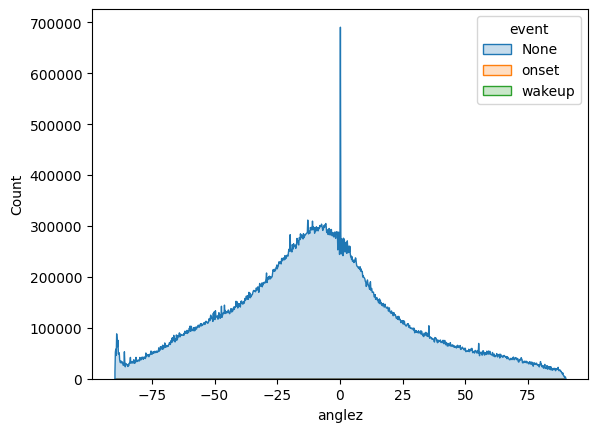

In [11]:
sns.histplot(df_comb2, x='anglez',element='poly', hue= 'event')

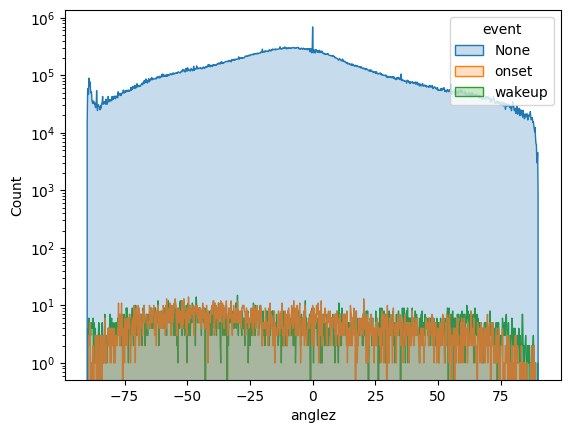

In [9]:
sns.histplot(df_comb2, x='anglez',element='poly', hue= 'event')
plt.yscale('log')

In [13]:
df_anglez_0 = df_comb2.query('anglez > -2 and anglez <2')

<Axes: xlabel='anglez', ylabel='Count'>

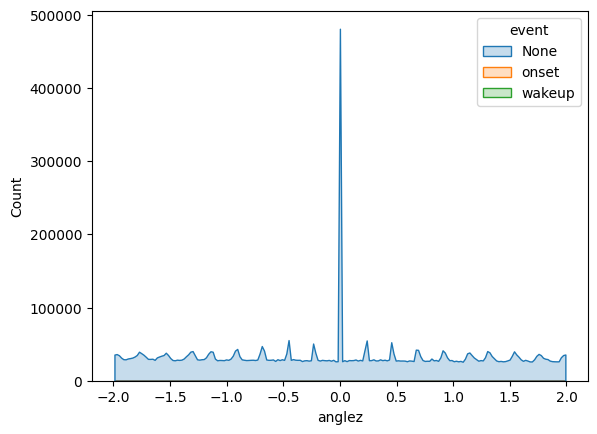

In [16]:
sns.histplot(df_anglez_0, x='anglez',element='poly', hue= 'event')

In [17]:
df_anglez_0_2 = df_anglez_0.query('anglez > -0.2 and anglez <0.2')

<Axes: xlabel='anglez', ylabel='Count'>

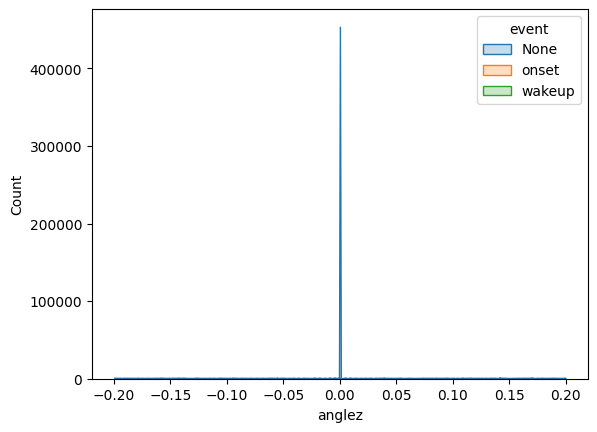

In [18]:
sns.histplot(df_anglez_0_2, x='anglez',element='poly', hue= 'event')

In [19]:
df_anglez_0_3 = df_anglez_0.query('anglez > -0.001 and anglez <0.001')

In [23]:
df_anglez_0_3.describe()

,step_x,timestamp,anglez,enmo,night,step_y
count,4.550170e+05,455017,4.550170e+05,455017.000000,11.000000,11.000000
mean,2.097122e+05,2018-10-13 22:37:45.052525312,5.736045e-08,0.000751,17.545455,294964.363636
min,3.000000e+00,2017-08-07 08:35:20,-9.000000e-04,0.000000,10.000000,168564.000000
25%,9.934200e+04,2018-07-25 22:44:45,0.000000e+00,0.000000,13.000000,216642.000000
50%,2.037710e+05,2018-10-20 07:55:05,0.000000e+00,0.000000,16.000000,262572.000000
75%,3.073860e+05,2018-11-08 08:37:05,0.000000e+00,0.000000,20.500000,341994.000000
max,1.432160e+06,2019-07-08 21:25:55,9.000000e-04,3.444100,32.000000,547020.000000
std,1.248815e+05,NaN,4.159091e-05,0.011306,6.361818,109933.692807


<Axes: xlabel='anglez', ylabel='Count'>

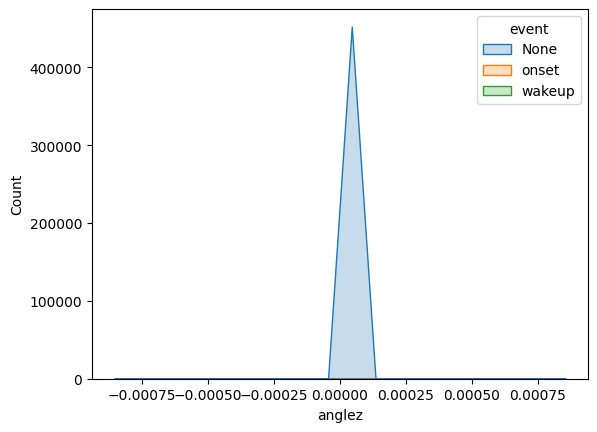

In [21]:
sns.histplot(df_anglez_0_3, x='anglez',element='poly', hue= 'event')

In [25]:
df_anglez_0_4 = df_anglez_0.query('anglez == 0')

In [34]:
df_anglez_0_4.describe()

,step_x,timestamp,anglez,enmo,night,step_y
count,452375.000000,452375,452375.0,452375.000000,11.000000,11.000000
mean,209292.823198,2018-10-14 11:07:40.757269760,0.0,0.000390,17.545455,294964.363636
min,3.000000,2017-08-07 08:35:20,0.0,0.000000,10.000000,168564.000000
25%,99250.500000,2018-07-26 22:52:12.500000,0.0,0.000000,13.000000,216642.000000
50%,203526.000000,2018-10-20 08:05:15,0.0,0.000000,16.000000,262572.000000
75%,306990.500000,2018-11-08 08:23:12.500000,0.0,0.000000,20.500000,341994.000000
max,722839.000000,2019-06-29 12:44:35,0.0,1.398600,32.000000,547020.000000
std,124176.490556,NaN,0.0,0.004257,6.361818,109933.692807


In [26]:
df_anglez_0_4.shape

(452375, 8)

In [28]:
df_anglez_0_4.columns

Index(['series_id', 'step_x', 'timestamp', 'anglez', 'enmo', 'night', 'event',
       'step_y'],
      dtype='object')

<Axes: xlabel='enmo', ylabel='Count'>

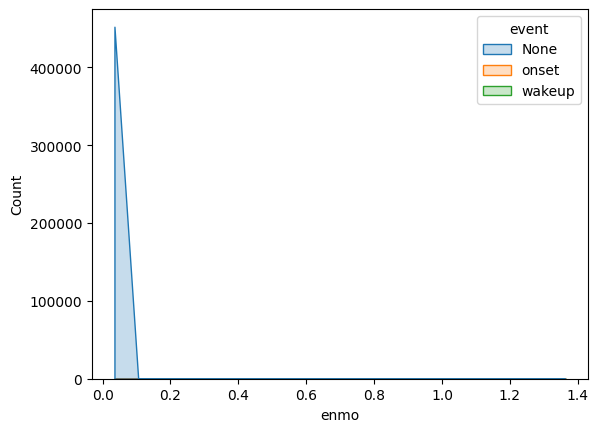

In [32]:
sns.histplot(df_anglez_0_4, x='enmo',element='poly', hue= 'event')

In [3]:
enmo0 = []

for i in df_anglez_0_4['enmo']:
    if i == 0:
        enmo0.append('0')
    else:
        enmo0.append('not 0')

df_anglez_0_4['enmois0'] = enmo0

NameError: name 'df_anglez_0_4' is not defined

<Axes: xlabel='timestamp', ylabel='enmo'>

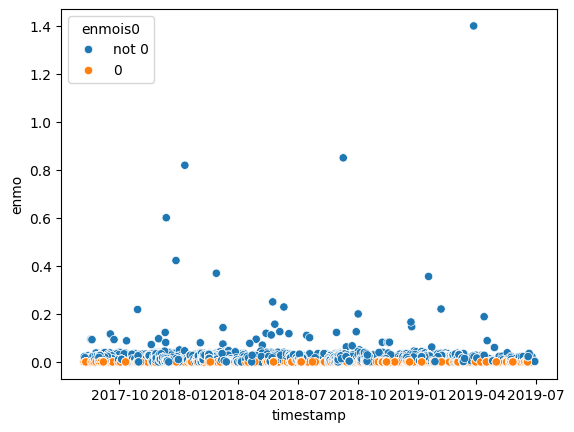

In [43]:
sns.scatterplot(df_anglez_0_4, x = 'timestamp', y = 'enmo', hue = 'enmois0')

<Axes: xlabel='step_x', ylabel='step_y'>

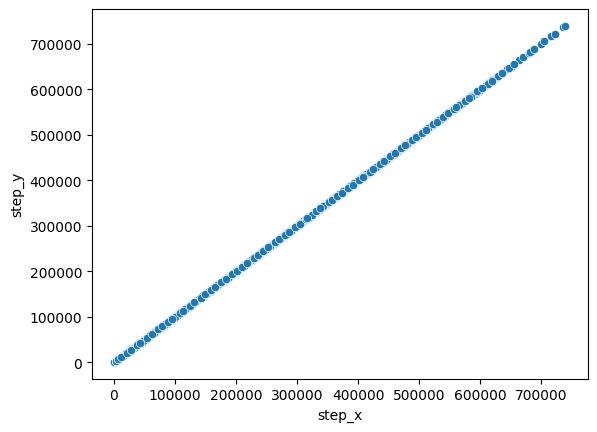

In [48]:
sns.scatterplot(df_comb, x='step_x', y = 'step_y')

There are five events with a very high (outliers) enmo value. I will investigate them:

In [28]:
df_enmo8 = df_comb.query('enmo > 8')

In [7]:
df_enmo8

,series_id,step_x,timestamp,anglez,enmo,night,event,step_y
36629300,4a31811f3558,293240,2018-11-02 19:16:40,40.013500,9.1863,NaN,None,NaN
36629301,4a31811f3558,293241,2018-11-02 19:16:45,36.660702,9.9388,NaN,None,NaN
36629302,4a31811f3558,293242,2018-11-02 19:16:50,37.369598,10.9134,NaN,None,NaN
36629303,4a31811f3558,293243,2018-11-02 19:16:55,37.038300,11.4337,NaN,None,NaN
36629304,4a31811f3558,293244,2018-11-02 19:17:00,39.218102,9.7422,NaN,None,NaN


--> all belong to the same person in the same night

In [21]:
df_comb.head()

,series_id,step_x,timestamp,anglez,enmo,night,event,step_y
0,038441c925bb,0,2018-08-14 19:30:00,2.6367,0.0217,NaN,None,NaN
1,038441c925bb,1,2018-08-14 19:30:05,2.6368,0.0215,NaN,None,NaN
2,038441c925bb,2,2018-08-14 19:30:10,2.6370,0.0216,NaN,None,NaN
3,038441c925bb,3,2018-08-14 19:30:15,2.6368,0.0213,NaN,None,NaN
4,038441c925bb,4,2018-08-14 19:30:20,2.6368,0.0215,NaN,None,NaN


In [2]:
df_high_enmo_series = df_comb2.query('series_id == 4a31811f3558')

NameError: name 'df_comb2' is not defined

In [29]:
df_enmo8['series_id'] == '4a31811f3558'

36629300    True
36629301    True
36629302    True
36629303    True
36629304    True
Name: series_id, dtype: bool

In [5]:
df_comb2['step_x'].isna().sum()

NameError: name 'df_comb2' is not defined